In [1]:
# importing necessary libraries
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset
df = pd.read_csv("Final_nrd_Prop_compn.csv")

In [3]:
df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,M,N,P,Q,R,S,T,V,W,Y
0,Q59288,Carb,0.801014,0.523114,0.542629,0.467243,0.723957,1.299343,0.682029,1.020857,...,0.018571,0.051429,0.041429,0.045714,0.038571,0.055714,0.054286,0.052857,0.022857,0.055714
1,Q9I6P8,Carb,1.331853,0.869786,0.902233,0.776888,1.203729,2.160428,1.134014,1.697387,...,0.008571,0.025714,0.018571,0.025714,0.050000,0.051429,0.024286,0.024286,0.012857,0.018571
2,Q9IH62,Carb,0.931412,0.608272,0.630963,0.543306,0.841811,1.510864,0.793056,1.187043,...,0.015714,0.064286,0.051429,0.035714,0.031429,0.072857,0.052857,0.058571,0.010000,0.035714
3,P52799,Carb,1.683814,1.099640,1.140661,0.982192,1.521832,2.731351,1.433694,2.145946,...,0.008571,0.025714,0.030000,0.018571,0.021429,0.045714,0.028571,0.031429,0.005714,0.021429
4,P49354,Carb,1.479446,0.966174,1.002216,0.862982,1.337124,2.399842,1.259683,1.885488,...,0.008571,0.032857,0.032857,0.041429,0.031429,0.027143,0.014286,0.034286,0.014286,0.027143


In [4]:
df.shape

(2747, 152)

In [5]:
df.Class.value_counts()

Carb      1111
CGC        693
Hetero     500
DNA        280
RNA        163
Name: Class, dtype: int64

In [6]:
DNA_df = df[(df['Class'] == 'DNA') | (df['Class'] == 'CGC')]

In [7]:
#Carb_df

In [8]:
DNA_df["target"] = np.where(DNA_df["Class"].str.contains("CGC"), 1, 0)

C:\Users\Senthil\AppData\Local\Temp/ipykernel_5932/4221699788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DNA_df["target"] = np.where(DNA_df["Class"].str.contains("CGC"), 1, 0)


In [9]:
DNA_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,N,P,Q,R,S,T,V,W,Y,target
1111,Q9NQ94,CGC,0.943956,0.616465,0.639461,0.550623,0.853148,1.531212,0.803737,1.203030,...,0.034286,0.052857,0.032857,0.045714,0.034286,0.052857,0.058571,0.005714,0.044286,1
1112,P00519,CGC,0.496204,0.324053,0.336142,0.289442,0.448469,0.804903,0.422496,0.632389,...,0.057143,0.128571,0.047143,0.091429,0.171429,0.092857,0.088571,0.018571,0.042857,1
1113,P42684,CGC,0.474374,0.309797,0.321354,0.276709,0.428739,0.769492,0.403909,0.604569,...,0.060000,0.132857,0.064286,0.087143,0.160000,0.105714,0.105714,0.018571,0.047143,1
1114,P25106,CGC,1.548923,1.011547,1.049282,0.903508,1.399917,2.512541,1.318840,1.974033,...,0.021429,0.018571,0.008571,0.015714,0.051429,0.032857,0.055714,0.011429,0.028571,1
1115,O95573,CGC,0.778764,0.508583,0.527556,0.454264,0.703847,1.263250,0.663083,0.992500,...,0.052857,0.050000,0.028571,0.038571,0.070000,0.057143,0.062857,0.011429,0.041429,1


In [10]:
# X -> features, y -> label
y=DNA_df['target']
X=DNA_df.drop(['Class','Entry','target'],axis=1)

In [55]:
y.sum()/len(DNA_df)

0.7122302158273381

In [11]:
print(f'X : {X.shape}')

X : (973, 150)


In [12]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state = 230,stratify = y)

In [13]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')     

X_train: (778, 150)
y_train: (778,)
X_test: (195, 150)
y_test: (195,)


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400,class_weight='balanced')

In [16]:
#clf.fit(X_train,y_train)

In [17]:
#clf.oob_score_

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [19]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132, 147, 162, 177, 193, 208, 223, 238, 254, 269, 284, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [57]:
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')

In [58]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [59]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 40, 55, 71, 86, 101, 116, 132,
                                          147, 162, 177, 193, 208, 223, 238,
                                          254, 269, 284, 300]},
             verbose=2)

In [62]:
best_rf_params = rf_Grid.best_params_
best_rf_params

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [63]:
rf_Model = rf_Grid.best_estimator_

In [64]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       min_samples_split=5, n_estimators=10, random_state=42)

In [65]:
rf_Model.feature_importances_

array([0.        , 0.        , 0.04406074, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00320005,
       0.        , 0.        , 0.01514582, 0.00356249, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00335335,
       0.        , 0.05015389, 0.        , 0.04249337, 0.        ,
       0.0475449 , 0.        , 0.00094566, 0.00302417, 0.        ,
       0.        , 0.        , 0.        , 0.00330534, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01535207,
       0.00094028, 0.        , 0.00336743, 0.        , 0.        ,
       0.05075965, 0.00170515, 0.        , 0.        , 0.01569032,
       0.00225683, 0.00118343, 0.        , 0.        , 0.01553658,
       0.0026801 , 0.01604775, 0.        , 0.        , 0.00149805,
       0.        , 0.00782967, 0.00155331, 0.        , 0.01422705,
       0.        , 0.04758359, 0.00420501, 0.        , 0.     

In [66]:
imp_feat=pd.DataFrame({'Feature_Name' : X.columns.tolist(), 'Feature_Importance' : rf_Model.feature_importances_})

In [67]:
imp_feat.sort_values(by = 'Feature_Importance', ascending=False, inplace = True)

In [68]:
imp_feat.head(21)

,Feature_Name,Feature_Importance
132,C,0.124264
50,IGEIM800108,0.050760
26,IV0,0.050154
81,IOOBM850105,0.049998
87,IRACS770102,0.048675
71,IMAXF760106,0.047584
30,IASAD,0.047545
2,IHp,0.044061
28,INl,0.042493
133,E,0.029169


In [69]:
imp_feat.to_csv('DNA_Feature_importance.csv', index = False)

In [70]:
y_train_prediction = rf_Model.predict(X_train)
y_test_prediction = rf_Model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
print ('---------Train')
print(classification_report(y_train,y_train_prediction))
print ('---------Test')
print(classification_report(y_test,y_test_prediction))

---------Train
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       224
           1       0.87      0.81      0.84       554

    accuracy                           0.77       778
   macro avg       0.73      0.75      0.74       778
weighted avg       0.79      0.77      0.78       778

---------Test
              precision    recall  f1-score   support

           0       0.42      0.48      0.45        56
           1       0.78      0.73      0.76       139

    accuracy                           0.66       195
   macro avg       0.60      0.61      0.60       195
weighted avg       0.68      0.66      0.67       195



In [72]:
clf_report_train = pd.DataFrame(classification_report(y_train,y_train_prediction, output_dict=True)).transpose().reset_index()
clf_report_train['Model'] = 'Train'

clf_report_test = pd.DataFrame(classification_report(y_test,y_test_prediction, output_dict=True)).transpose().reset_index()
clf_report_test['Model'] = 'Test'

clf_report = pd.concat([clf_report_train,clf_report_test]) 
clf_report.to_csv('DNA_Clf_Report.csv', index = False)
clf_report

,index,precision,recall,f1-score,support,Model
0,0,0.590909,0.696429,0.639344,224.000000,Train
1,1,0.867704,0.805054,0.835206,554.000000,Train
2,accuracy,0.773779,0.773779,0.773779,0.773779,Train
3,macro avg,0.729307,0.750741,0.737275,778.000000,Train
4,weighted avg,0.788010,0.773779,0.778814,778.000000,Train
0,0,0.421875,0.482143,0.450000,56.000000,Test
1,1,0.778626,0.733813,0.755556,139.000000,Test
2,accuracy,0.661538,0.661538,0.661538,0.661538,Test
3,macro avg,0.600250,0.607978,0.602778,195.000000,Test
4,weighted avg,0.676174,0.661538,0.667806,195.000000,Test


In [73]:
y_train_predpro = rf_Model.predict_proba(X_train)[:,1]
y_test_predpro = rf_Model.predict_proba(X_test)[:,1]

In [74]:
y_train_pred =rf_Model.predict(X)

In [75]:
y_train_predpro = rf_Model.predict_proba(X)[:,1]

In [76]:
DNA_df.shape

(973, 155)

In [77]:
DNA_df['y_train_pred']=y_train_pred

C:\Users\Senthil\AppData\Local\Temp/ipykernel_5932/2889968376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DNA_df['y_train_pred']=y_train_pred


In [78]:
DNA_df['y_train_predpro']=y_train_predpro

C:\Users\Senthil\AppData\Local\Temp/ipykernel_5932/3348486766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DNA_df['y_train_predpro']=y_train_predpro


In [79]:
DNA_df.head()

,Entry,Class,IK0,IHt,IHp,IP,IpHi,IpK',IMw,IBl,...,Q,R,S,T,V,W,Y,target,y_train_pred,y_train_predpro
1111,Q9NQ94,CGC,0.943956,0.616465,0.639461,0.550623,0.853148,1.531212,0.803737,1.203030,...,0.032857,0.045714,0.034286,0.052857,0.058571,0.005714,0.044286,1,1,0.610135
1112,P00519,CGC,0.496204,0.324053,0.336142,0.289442,0.448469,0.804903,0.422496,0.632389,...,0.047143,0.091429,0.171429,0.092857,0.088571,0.018571,0.042857,1,1,0.799025
1113,P42684,CGC,0.474374,0.309797,0.321354,0.276709,0.428739,0.769492,0.403909,0.604569,...,0.064286,0.087143,0.160000,0.105714,0.105714,0.018571,0.047143,1,1,0.810330
1114,P25106,CGC,1.548923,1.011547,1.049282,0.903508,1.399917,2.512541,1.318840,1.974033,...,0.008571,0.015714,0.051429,0.032857,0.055714,0.011429,0.028571,1,1,0.547305
1115,O95573,CGC,0.778764,0.508583,0.527556,0.454264,0.703847,1.263250,0.663083,0.992500,...,0.028571,0.038571,0.070000,0.057143,0.062857,0.011429,0.041429,1,1,0.507011


C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


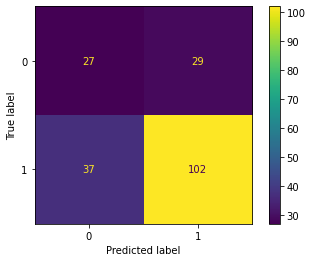

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(rf_Model, X_test, y_test) 

In [ ]:
sensitivity = 18/(18+38)
sensitivity

In [ ]:
specificity = 130/(130+9)
specificity

In [ ]:
precision = 18/(18+9)
precision

In [ ]:
sensitivity + specificity

In [ ]:
f1 = (precision * sensitivity)/(precision+sensitivity)
f1

C:\Users\Senthil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


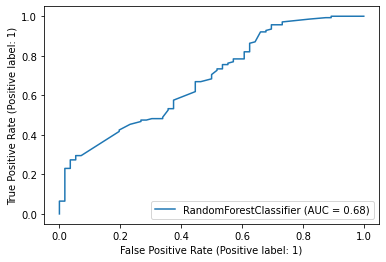

In [81]:
plot_roc_curve(rf_Model, X_test, y_test)  